In [132]:
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.stattools import medcouple
from scipy.stats import skew
from scipy.stats import gamma

plt.rcParams['figure.figsize'] = [15, 7]

In [133]:
df = pd.read_csv("./outlierDatasets/synthetic.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


In [134]:
X = df.iloc[:, 4:6].values
copy_X = df.iloc[:, 2:4]
y = df.iloc[:, -1:].values

In [135]:
le = LabelEncoder()
y = le.fit_transform(y)

/home/karson/Documents/GitHub/Outlier-Detection/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,10)
testDis = distReturn.reshape(1,-1)

In [137]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

In [138]:
#gamma
newArr = arr / max(arr)
fit_alpha, fit_loc, fit_beta = gamma.fit(newArr)
print(newArr)

[0.0804304  0.07403752 0.14861196 0.57222388 0.09106785 0.09082171
 0.04251839 0.07426696 0.06206366 0.07138414 0.46565671 0.04569372
 0.05201553 0.04145893 0.11253916 0.05629386 0.03853804 0.03638902
 0.08252213 0.09298093 0.17551297 0.04646864 0.04272184 0.39010647
 0.04072363 0.07929493 0.56022223 0.03479771 0.83723738 0.04962269
 0.07799497 0.08399886 0.07029446 0.05767093 0.04099623 0.04346143
 0.0366013  0.06543367 0.06963918 0.06143321 0.12581636 0.05187932
 0.05861911 0.06862301 0.67851583 0.07133427 0.06913619 0.08991523
 0.34457046 0.04120855 0.06981847 0.04816682 0.05943617 0.05016758
 0.05441623 0.06024223 0.07608803 0.04085094 0.06141701 0.05889015
 0.04727533 0.07567196 0.03940658 0.03602333 0.03461207 0.40124881
 0.06076565 0.13872047 0.05141522 0.14220789 0.05770245 0.08278567
 0.08771892 0.04798154 0.10629182 0.04190084 0.05547782 0.06948245
 0.06290415 0.04477111 0.03441938 0.05968268 0.44195262 0.09624853
 0.05786322 0.07130244 0.1581445  0.12811593 0.08129913 0.0666

In [139]:
gamma.cdf(newArr[26],fit_alpha, fit_loc, fit_beta)

np.float64(0.9968243307546394)

In [140]:
count = 0
outliers = []
for x in range(newArr.shape[0]):
    hol = gamma.cdf(newArr[x], fit_alpha, fit_loc, fit_beta)
    if hol > .95:
        outliers.append(x)
    
    count += 1

print(count,outliers)

1000 [3, 10, 23, 26, 28, 44, 48, 65, 82, 103, 120, 127, 141, 204, 228, 244, 270, 279, 282, 289, 312, 315, 339, 351, 368, 377, 384, 408, 416, 426, 433, 445, 453, 510, 524, 536, 538, 545, 550, 572, 578, 581, 602, 609, 612, 623, 633, 648, 660, 679, 687, 711, 713, 716, 717, 734, 742, 746, 754, 766, 782, 790, 801, 831, 833, 844, 859, 863, 882, 899, 900, 901, 903, 910, 911, 912, 921, 931, 977, 978, 987, 998]


In [141]:
newOutliers = []
for z in outliers:
    newOutliers += [X[z]]

In [142]:
newOutliers = np.array(newOutliers)
print(newOutliers)

[[0.05387244 0.81749931]
 [0.0411154  0.30481349]
 [0.25450516 0.44092021]
 [0.95015164 0.29855145]
 [0.67798253 0.10952313]
 [0.40395313 0.77649238]
 [0.35230415 0.06913662]
 [0.09406827 0.71862799]
 [0.62974824 0.38431409]
 [0.30207977 0.52614752]
 [0.52365849 0.96455273]
 [0.25080783 0.32019419]
 [0.65601374 0.37658891]
 [0.11758099 0.99721148]
 [0.5862971  0.99690603]
 [0.66106943 0.05987371]
 [0.62294266 0.75742625]
 [0.23922925 0.78278315]
 [0.63427995 0.22630106]
 [0.79083187 0.22936609]
 [0.44148001 0.11567543]
 [0.10452004 0.56044401]
 [0.21136834 0.97376456]
 [0.42326468 0.75434989]
 [0.61260586 0.30621872]
 [0.20351433 0.53446788]
 [0.63773931 0.4624992 ]
 [0.2147573  0.74150646]
 [0.27808274 0.38134307]
 [0.57275099 0.33406639]
 [0.41780775 0.06321893]
 [0.1825997  0.28018896]
 [0.16089571 0.37318718]
 [0.42960603 0.47535593]
 [0.21693598 0.3411642 ]
 [0.79797523 0.36469689]
 [0.39422585 0.11723738]
 [0.92533356 0.300121  ]
 [0.46148204 0.052933  ]
 [0.63357465 0.90946783]


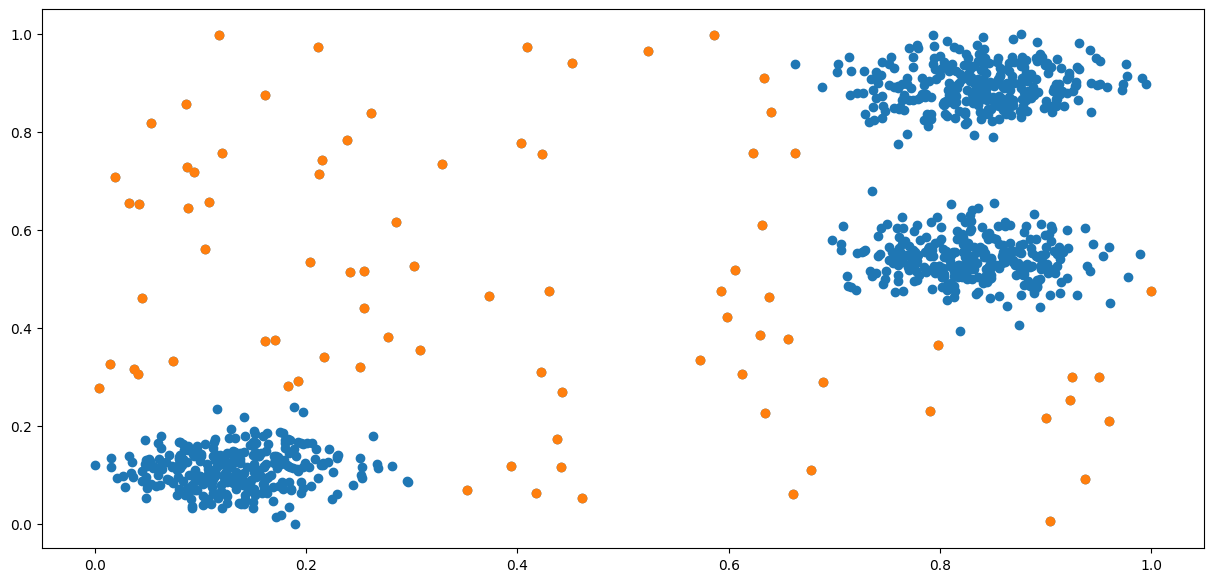

In [143]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(newOutliers[:,0],newOutliers[:,1])
plt.show()

In [145]:
root = 0
for t in outliers:
    if y[t] == 1:
        root += 1

print(root,len(outliers))

80 82
